# Convolutional Neural Networks

## Project: Dog-Breed Identification 


This is a Dog Breed Classifier CNN model created on Python using Keras Library, Theano, Tensorflow and Terminal.
The Goal is to Classify Images of Dogs according to their Breed.


# Meaning of most of the terminologies used in the Project/Notebook:

Jupyter Notebook: Jupyter Notebook which is a spun off of Python which is created to "develop open-source software, open-standards, and services for interactive computing across dozens of programming languages."

Terminal: Terminal is the terminal emulator included in the macOS operating system by Apple.

Keras Library: Keras is an open-source neural-network library written in Python.

TensorFlow: TensorFlow is a free and open-source software library for dataflow and differentiable programming across a range of tasks.

Theano: Theano is a Python library and optimizing compiler for manipulating and evaluating mathematical expressions, especially matrix-valued ones.

Dataset: Dataset is a collection of data.

NumPy: NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Scikit-learn Library: Scikit-learn is a free software machine learning library for the Python programming language.

OpenCV: OpenCV is a library of programming functions mainly aimed at real-time computer vision.

XML: Extensible Markup Language is a markup language that defines a set of rules for encoding documents in a format that is both human-readable and machine-readable.

Haarcascades: Haar Cascade is basically a classifier which is used to detect the object for which it has been trained for, from the source.

Github: The Place where Software Programmers store their codes and access it using Internet.

ResNet-50: ResNet-50 is a convolutional neural network that is trained on more than a million images from the ImageNet database.

ImageNet: The ImageNet project is a large visual database designed for use in visual object recognition software research.

Train the Model:
Trainin my model in the code cell. Use model checkpointing to save the model that attains the best validation loss.

VGG-19: VGG-19 is a convolutional neural network that is trained on more than a million images from the ImageNet database

ResNet-50: ResNet-50 is a convolutional neural network that is trained on more than a million images from the ImageNet database.

Inception: Inception is a technique originally used in LeNet, this was a successful convolutional neural network or CNN for identifying patterns in images.

LeNet: LeNet-5 is our latest convolutional network designed for handwritten and machine-printed character recognition.

Xception: Xception is a convolutional neural network that is trained on more than a million images from the ImageNet database.


---
### Why We're Here 

I have developed an algorithm that could be used as part of a web application. At the end of this project, my code will accept any user-supplied image as input. If a dog is detected in the image, it will provide an estimate of the dog's breed. If a human is detected, it will provide the Output as a Human. The image below displays potential sample output of my finished project. 

![Sample Dog Output](images/sample_dog_output.png)


### The Road Ahead

I broken down this notebook into separate steps. Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Writing the Algorithm
* [Step 7](#step7): Testing the Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, I imported a dataset of dog images.  I populated a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
#train_files, train_targets = load_dataset('../../../data/dog_images/train')
train_files, train_targets = load_dataset('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/dogImages/train')
#valid_files, valid_targets = load_dataset('../../../data/dog_images/valid')
valid_files, valid_targets = load_dataset('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/dogImages/valid')
#test_files, test_targets = load_dataset('../../../data/dog_images/test')
test_files, test_targets = load_dataset('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("/Users/arjunmenon/Desktop/Dog-Breed-Classifier/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.
/Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, I imported a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [2]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("/Users/arjunmenon/Desktop/Dog-Breed-Classifier/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 18982 total human images.


---
<a id='step1'></a>
## Step 1: Detect Humans

I used OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades). I have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, I will demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


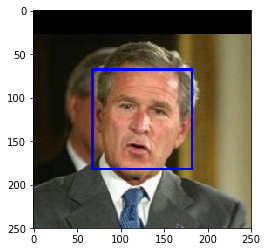

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

I have used this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

###  Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, I would like 100% of human images with a detected face and 0% of dog images with a detected face.  The algorithm falls short of this goal, but still gives acceptable performance.  I have extracted the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

In [5]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
#accuracy_dog = 100-np.array(list(map(face_detector, dog_files_short))).sum()
#accuracy_human = np.array(list(map(face_detector, human_files_short))).sum()

#print('Accuracy on Dogs Files: {}% Accuracy on Human Files: {}%'.format(accuracy_dog, accuracy_human))

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, I have used a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images. The first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [6]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_mod = ResNet50(weights='imagenet')

W1114 23:17:32.731157 4518128960 deprecation_wrapper.py:119] From /Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1114 23:17:32.773406 4518128960 deprecation_wrapper.py:119] From /Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1114 23:17:32.779994 4518128960 deprecation_wrapper.py:119] From /Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1114 23:17:32.813360 4518128960 deprecation_wrapper.py:119] From /Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The na

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which I'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since I am working with color images, each image has three channels.  Likewise, since I am processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in my dataset!

In [7]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  This is the way for checking the code `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that I have a way to format our image for supplying to ResNet-50, I am now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, I will obtain an integer corresponding to the model's predicted object class, which I can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [8]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_mod.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), I have noticed that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`. Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, I will need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

I have used these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ I have used the code cell below to test the performance of my `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
#accuracy_dog = (np.array(list(map(dog_detector, dog_files_short)))).mean()
#accuracy_human = (1-(np.array(list(map(dog_detector,human_files_short))))).mean()
#print('Accuracy on Dog Files: {:.0f}%\nAccuracy on Human Files: {:.0f}%'.format(accuracy_dog*100,accuracy_human*100))

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that I have functions for detecting humans and dogs in images, I need a way to predict breed from images. In this step, I have created a CNN that classifies dog breeds. I had created my CNN _from scratch_ (so, I haven't used transfer learning _yet_!), and I have attained a test accuracy of at least 1%.  In Step 5 of this notebook, there is an opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means there is more likely chance that I need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; I had extrapolate this estimate to figure out how long it will take for my algorithm to train. 

I mentioned that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black. My vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

I have also mentioned that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%. 

### Pre-process the Data

I have rescaled the images by dividing every pixel in every image by 255.

In [11]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:09<00:00, 88.06it/s] 


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of the code cell block, I have summarized the layers of my model by executing the line:
    
        model.summary()

I have imported some Python modules to get started. If I end up getting stuck, there is a hint/trick that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Here I have outlined the steps I took to get to my final CNN architecture and for my reasoning at each step. If I had chosen to use the hinted architecture above, I would have described why I thought that CNN architecture should work well for the image classification task.

__Answer:__ I have used the hinted architecture above simply because it had three layers of convolution network and max pooling layers followed by a global average pooling layer and a dense network. This was in line with what was described in the lecture and due to the fact that there are three convolutional layers that are stacked, this would allow for patterns that are larger.

In [12]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(input_shape=train_tensors.shape[1:],filters=16,kernel_size=2, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32,kernel_size=2, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64,kernel_size=2, activation='relu'))
model.add(MaxPooling2D())
model.add(GlobalAveragePooling2D())
model.add(Dense(133,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 16)      208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      2080      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 54, 54, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
__________

### Compile the Model

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

W1114 23:20:57.124458 4518128960 deprecation_wrapper.py:119] From /Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### (IMPLEMENTATION) Train the Model

I have Trained my model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

This is to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [14]:
from keras.callbacks import ModelCheckpoint  

### specify the number of epochs that I have used to train the model.
epochs = 20

checkpointer = ModelCheckpoint(filepath='/Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

W1114 23:20:57.371769 4518128960 deprecation.py:323] From /Users/arjunmenon/anaconda3/envs/dog-project/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 86s 13ms/step - loss: 4.8821 - acc: 0.0093 - val_loss: 4.8626 - val_acc: 0.0096

Epoch 00001: val_loss improved from inf to 4.86258, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.from_scratch.hdf5
Epoch 2/20
6680/6680 [==============================] - 75s 11ms/step - loss: 4.8416 - acc: 0.0150 - val_loss: 4.8223 - val_acc: 0.0180

Epoch 00002: val_loss improved from 4.86258 to 4.82234, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.from_scratch.hdf5
Epoch 3/20
6680/6680 [==============================] - 75s 11ms/step - loss: 4.7998 - acc: 0.0169 - val_loss: 4.8019 - val_acc: 0.0228

Epoch 00003: val_loss improved from 4.82234 to 4.80194, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.from_scratch.hdf5
Epoch 4/20
6680/6680 [==============================] - 6

### Load the Model with the Best Validation Loss

In [15]:
model.load_weights('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

I have tried out my model on the test dataset of dog images. To ensure that I had a test accuracy is greater than 1%.

In [16]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 5.0239%


## ---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, I have shown how to train a CNN using transfer learning.

### Obtain Bottleneck Features

In [17]:
bottleneck_features = np.load('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model. I will only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [18]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [19]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [20]:
checkpointer = ModelCheckpoint(filepath='/Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 8s 1ms/step - loss: 12.4227 - acc: 0.1079 - val_loss: 10.6577 - val_acc: 0.2192

Epoch 00001: val_loss improved from inf to 10.65771, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.VGG16.hdf5
Epoch 2/20
6680/6680 [==============================] - 3s 506us/step - loss: 9.8873 - acc: 0.2919 - val_loss: 9.8401 - val_acc: 0.2946

Epoch 00002: val_loss improved from 10.65771 to 9.84009, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.VGG16.hdf5
Epoch 3/20
6680/6680 [==============================] - 3s 434us/step - loss: 9.1569 - acc: 0.3636 - val_loss: 9.2781 - val_acc: 0.3341

Epoch 00003: val_loss improved from 9.84009 to 9.27807, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.VGG16.hdf5
Epoch 4/20
6680/6680 [==============================] - 3s 435us/step - loss

### Load the Model with the Best Validation Loss

In [21]:
VGG16_model.load_weights('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, I can use the CNN to test how well it identifies breed within our test dataset of dog images. I can print the test accuracy below.

In [22]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 46.4115%


### Predict Dog Breed with the Model

In [23]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)].split('.')[-1]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

I have now used the transfer learning to create a CNN that can identify dog breed from images. My CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, I have used the bottleneck features from a different pre-trained model.  To make things easier for me, I have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [24]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/bottleneck_features/DogResnet50Data.npz')
train_ResNet50 = bottleneck_features['train']
valid_ResNet50 = bottleneck_features['valid']
test_ResNet50 = bottleneck_features['test']

### Model Architecture

Create a CNN to classify dog breed.  At the end of the code cell block, summarize the layers of the model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps that was taken to get to the final CNN architecture and my reasoning at each step.  Describe why I have thought the architecture is suitable for the current problem.

__Answer:__ I have empirically tested the VGG16, InceptionV3 and Resnet50 CNN architectures and went ahead with the ResNet50 because it produced a higher accuracy rate. Using Resnet combined with the Global Average Pooling and a densenet with softmax activation allows effective classification of the images.

In [25]:
ResNet50_model = Sequential()
ResNet50_model.add(GlobalAveragePooling2D(input_shape=train_ResNet50.shape[1:]))
ResNet50_model.add(Dense(133, activation='softmax'))

ResNet50_model.summary()
### Define the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [26]:
ResNet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
### Compile the model

### Train the Model

Train my model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

This is the link for the code given below [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [27]:
checkpointer = ModelCheckpoint(filepath='/Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.ResNet50.hdf5', 
                               verbose=1, save_best_only=True)

ResNet50_model.fit(train_ResNet50, train_targets, 
          validation_data=(valid_ResNet50, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)
### Train the model.

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 7s 981us/step - loss: 1.5947 - acc: 0.6037 - val_loss: 0.8145 - val_acc: 0.7461

Epoch 00001: val_loss improved from inf to 0.81452, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.ResNet50.hdf5
Epoch 2/20
6680/6680 [==============================] - 5s 687us/step - loss: 0.4247 - acc: 0.8651 - val_loss: 0.6793 - val_acc: 0.7820

Epoch 00002: val_loss improved from 0.81452 to 0.67926, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.ResNet50.hdf5
Epoch 3/20
6680/6680 [==============================] - 4s 664us/step - loss: 0.2524 - acc: 0.9217 - val_loss: 0.6721 - val_acc: 0.7832

Epoch 00003: val_loss improved from 0.67926 to 0.67209, saving model to /Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.ResNet50.hdf5
Epoch 4/20
6680/6680 [==============================] - 6s 826us/step

### Load the Model with the Best Validation Loss

In [28]:
ResNet50_model.load_weights('/Users/arjunmenon/Desktop/Dog-Breed-Classifier/saved_models/weights.best.ResNet50.hdf5')
### Load the model weights with the best validation loss.VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

I have Tried the model on the test dataset of dog images. To ensure that the test accuracy is greater than 60%.

In [29]:
# get index of predicted dog breed for each image in test set
ResNet50_predictions = [np.argmax(ResNet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_ResNet50]

# report test accuracy
test_accuracy = 100*np.sum(np.array(ResNet50_predictions)==np.argmax(test_targets, axis=1))/len(ResNet50_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)
### Calculate classification accuracy on the test dataset.

Test accuracy: 82.2967%


### Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by my model.  

Similar to the analogous function in Step 5, my function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to my chosen CNN architecture, I need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

This image looks like a Pomeranian.


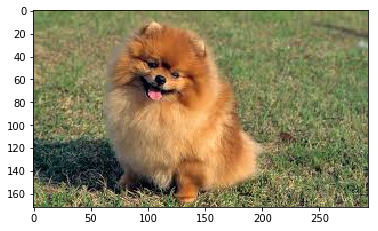

In [30]:
### A function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
img_path = '/Users/arjunmenon/Desktop/Dog-Breed-Classifier/images/Pomeranian.jpeg'
#img_path = dog_files_short[2]

def extract_Resnet50(tensor):
    from keras.applications.resnet50 import ResNet50, preprocess_input
    return ResNet50(weights='imagenet', include_top=False, pooling="avg").predict(preprocess_input(tensor))

def classify_dog_breed(img_path):
    img = path_to_tensor(img_path)
    bottleneck_feature1 = extract_Resnet50(img)
    
    bottleneck_feature1 = np.expand_dims(bottleneck_feature1, axis=0)
    bottleneck_feature1 = np.expand_dims(bottleneck_feature1, axis=0)
    #bottleneck_feature1 = np.expand_dims(bottleneck_feature1, axis=0)
    
    
    predictions = ResNet50_model.predict(bottleneck_feature1)
    prediction = np.argmax(predictions)
    dog_names[prediction].split('.')[-1]
    print('This image looks like a {}.'.format(dog_names[prediction].split('.')[-1]))
    return dog_names[prediction].split('.')[-1]
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
prediction = classify_dog_breed(img_path)

---
<a id='step6'></a>
## Step 6: Writing the Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

We can use more functions for detecting humans and dogs in images, but I used `face_detector` and `dog_detector` functions developed above. Since, I am __required__ to use the CNN from Step 5 to predict dog breed.  

### Writing the Algorithm

In [31]:
def return_breed(img_path):
    if face_detector(img_path):
        print('Human Detected')
        print('\n')
        return ('This looks like a human')
    elif dog_detector(img_path):
        print('Dog Detected')
        breed = classify_dog_breed(img_path)
        print('\n')
        return breed
    else:
        print('Neither Human nor Dog detected (as per the training set)')
        print('\n')
        return 'Neither human nor dog (as per the training set)'

---
<a id='step7'></a>
## Step 7: Testing the Algorithm

In this section, I have taken my new algorithm for a spin!
Ever Thought what kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Testing the Algorithm on Sample Images!

I have tested the algorithm at least six images on in my computer.  

__Question 6:__ Is the output better than what I expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for the algorithm.

__Answer:__ The output is actually much better than what I expected. I am gettin greater than %80 accuracy on types of dogs which was above my expectations. It predicts the accuracy of both dogs correctly. It does not mistake cats for dogs in the two sample images I have used.

In [35]:
## Execute the algorithm from Step 6 on
## at least 6 images on the computer.
## Feel free to use as many code cells as needed.

for img_path in sorted(glob("/Users/arjunmenon/Desktop/Dog-Breed-Classifier/check_images/*")):
    print(img_path)
    return_breed(img_path)

/Users/arjunmenon/Desktop/Dog-Breed-Classifier/check_images/American_foxhound_00531.jpg
Dog Detected
This image looks like a American_foxhound.


/Users/arjunmenon/Desktop/Dog-Breed-Classifier/check_images/Brittany_02625.jpg
Dog Detected
This image looks like a Brittany.


/Users/arjunmenon/Desktop/Dog-Breed-Classifier/check_images/Donald_Trump_0001.jpg
Human Detected


/Users/arjunmenon/Desktop/Dog-Breed-Classifier/check_images/Saint_bernard_08010.jpg
Dog Detected
This image looks like a Saint_bernard.


/Users/arjunmenon/Desktop/Dog-Breed-Classifier/check_images/cat1.jpg
Neither Human nor Dog detected (as per the training set)




#                             Thank You for Observing my Project.                                      #